<a href="https://colab.research.google.com/github/sarankumar1325/NAVIGATELABSAI-ASSESMENT-1/blob/main/Navigate_Labs_Assesment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the Dataset**

In [11]:
# Step 1: Install the Kaggle package
!pip install kaggle

# Step 2: Upload your Kaggle API token
from google.colab import files
files.upload()  # This will prompt you to upload the kaggle.json file

# Step 3: Configure Kaggle API
import os
os.makedirs('~/.kaggle', exist_ok=True)
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Step 4: Download the dataset
!kaggle datasets download -d atharvaingle/crop-recommendation-dataset

# Step 5: Unzip the dataset
!unzip crop-recommendation-dataset.zip

# Step 6: Load the dataset
import pandas as pd
crop_data = pd.read_csv('Crop_recommendation.csv')

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset
License(s): apache-2.0
  0% 0.00/63.7k [00:00<?, ?B/s]
100% 63.7k/63.7k [00:00<00:00, 75.3MB/s]
Archive:  crop-recommendation-dataset.zip
  inflating: Crop_recommendation.csv  


**Import libraries**

In [12]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

colorarr = ['#0592D0','#Cd7f32', '#E97451', '#Bdb76b', '#954535', '#C2b280', '#808000','#C2b280', '#E4d008', '#9acd32', '#Eedc82', '#E4d96f',
           '#32cd32','#39ff14','#00ff7f', '#008080', '#36454f', '#F88379', '#Ff4500', '#Ffb347', '#A94064', '#E75480', '#Ffb6c1', '#E5e4e2',
           '#Faf0e6', '#8c92ac', '#Dbd7d2','#A7a6ba', '#B38b6d']

**Task 2: Find the number of rows in the dataset**

In [13]:
# Get number of rows
num_rows = crop_data.shape[0]
print(f"Number of rows in the dataset: {num_rows}")

Number of rows in the dataset: 2200


**Task 3: Find rows with missing values**

In [14]:
# Check for missing values
missing_values = crop_data.isnull().sum()
missing_columns = missing_values[missing_values > 0]
print("Columns with missing values:")
print(missing_columns)

Columns with missing values:
Series([], dtype: int64)


**Task 4: Statistical summary of the dataset**

In [15]:
# Statistical summary
stats_summary = crop_data.describe()
print(stats_summary)

                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117  


**Task 5: Replace missing values**

In [17]:
# Replace numeric columns with their mean
for column in crop_data.select_dtypes(include=['float64', 'int64']).columns:
    crop_data[column] = crop_data[column].fillna(crop_data[column].mean())

# Replace categorical columns with their most common value
for column in crop_data.select_dtypes(include=['object']).columns:
    crop_data[column] = crop_data[column].fillna(crop_data[column].mode()[0])

**Task 6: Binning for Nitrogen content**

In [18]:
# Define bins
bins = [0, 50, 100, 150]
labels = ['low', 'medium', 'high']

# Create a new column for Nitrogen bins
crop_data['N_bin'] = pd.cut(crop_data['N'], bins=bins, labels=labels, right=False)

# Count observations in each bin
bin_counts = crop_data['N_bin'].value_counts()
print("Counts in each N_bin:")
print(bin_counts)

Counts in each N_bin:
N_bin
low       1292
medium     594
high       314
Name: count, dtype: int64


**Task 7: Normalization for Phosphorous content**

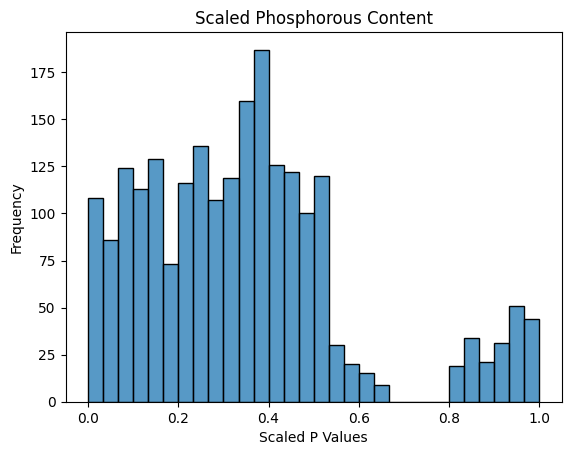

In [19]:
from sklearn.preprocessing import MinMaxScaler

# Scale the P column
scaler = MinMaxScaler()
crop_data['P_scaled'] = scaler.fit_transform(crop_data[['P']])

# Visualize the scaling
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(crop_data['P_scaled'], bins=30)
plt.title('Scaled Phosphorous Content')
plt.xlabel('Scaled P Values')
plt.ylabel('Frequency')
plt.show()

**Task 8: Crop type and rainfall analysis**

In [21]:
# Check the column names
print(crop_data.columns)

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label',
       'N_bin', 'P_scaled'],
      dtype='object')


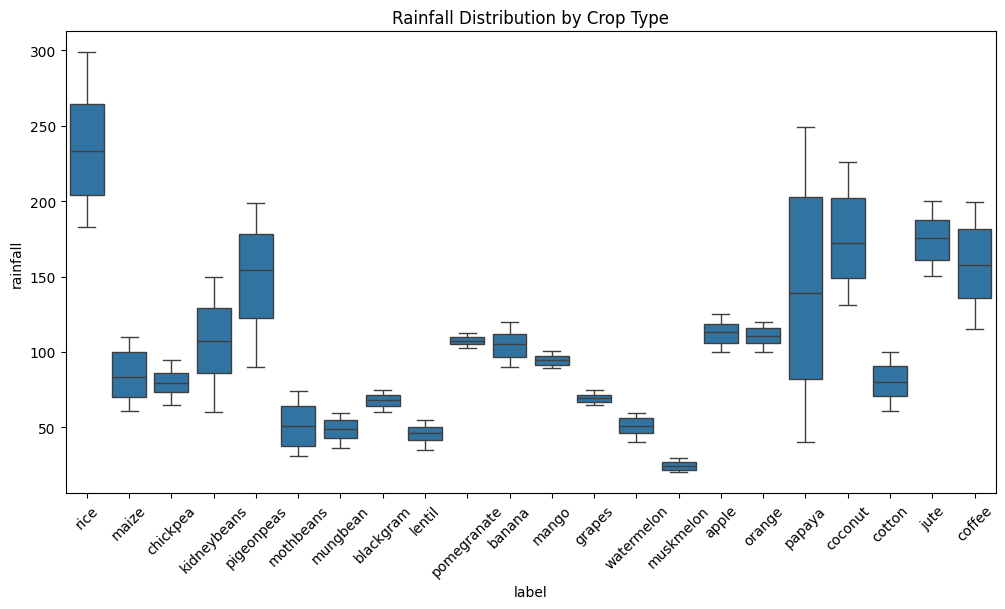

In [23]:
# Boxplot for rainfall by crop label
plt.figure(figsize=(12, 6))
sns.boxplot(data=crop_data, x='label', y='rainfall')  # Use 'label' instead of 'crop_type'
plt.title('Rainfall Distribution by Crop Type')
plt.xticks(rotation=45)
plt.show()

**Task 9: Temperature and crop type analysis**

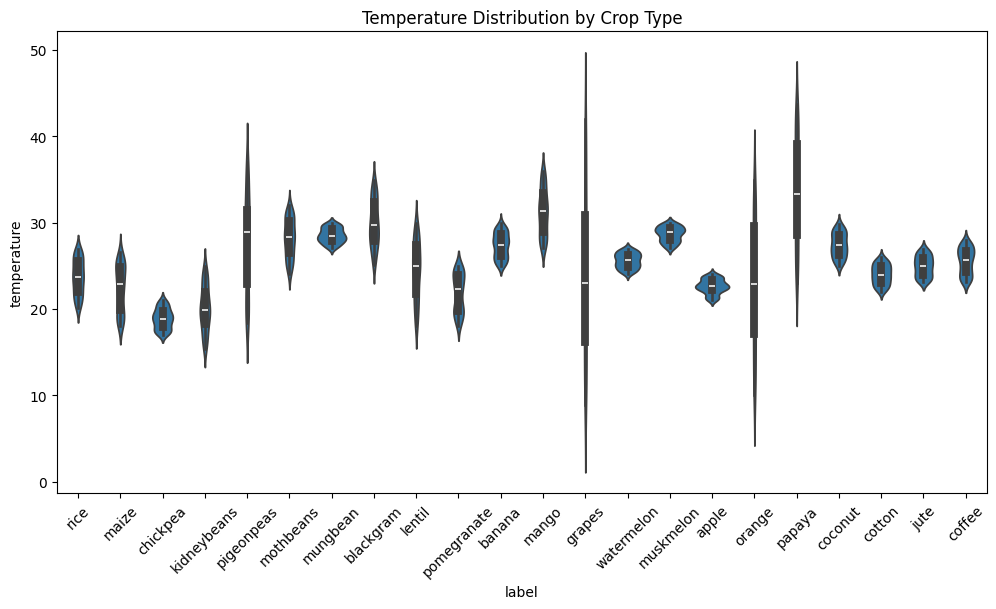

In [24]:
# Violin plot for temperature by crop label
plt.figure(figsize=(12, 6))
sns.violinplot(data=crop_data, x='label', y='temperature')  # Use 'label' instead of 'crop_type'
plt.title('Temperature Distribution by Crop Type')
plt.xticks(rotation=45)
plt.show()

**Task 10: Correlation analysis**

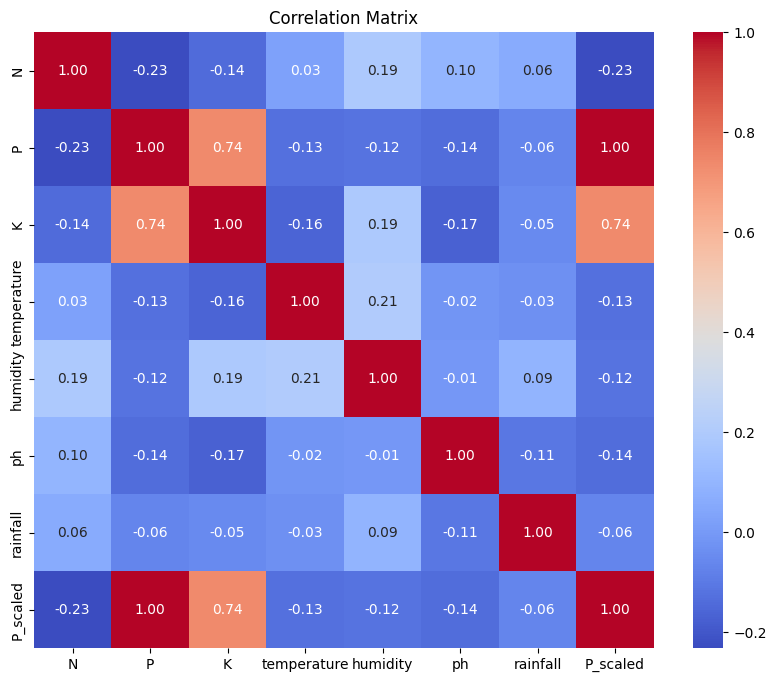

In [26]:
# Select only numeric columns for correlation analysis
numeric_cols = crop_data.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlation matrix
correlation_matrix = crop_data[numeric_cols].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Task 11: Train a model**

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Prepare data
X = crop_data.drop(columns=['label', 'N_bin'], errors='ignore')  # Use 'label' instead of 'crop_type'
y = crop_data['label']  # Target variable



In [30]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [31]:
# Make predictions
y_pred = model.predict(X_test)

In [32]:
# Evaluate the model
print(classification_report(y_test, y_pred))
confusion_mat = confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      0.96      0.94        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.92      0.96        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

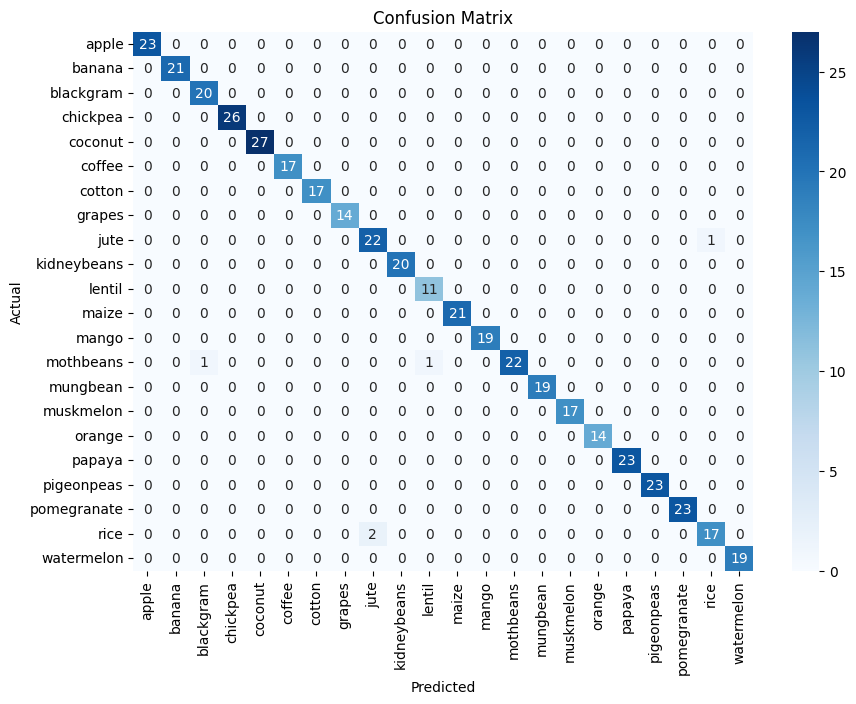

In [33]:
# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()